### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### 1. Import the necessary packages - 2.5 marks

In [3]:
import pandas as pd 
import numpy as np

# Enable graph plot in Jupyter notebook

import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
%matplotlib inline

import seaborn as sns

from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Remove scientific notations to display numbers with 2 decimals
pd.options.display.float_format = '{:,.2f}'.format        

# Increase cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Set default style
sns.set_style(style='darkgrid')

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [1893]:
# Read datafile in to pandas dataframes
mdf = pd.read_csv("item.csv") # MOVIES List/Database Table
udf = pd.read_csv("user.csv") # USERS List/Database Table
xdf = pd.read_csv("Data.csv") # RATINGS Data of Movies by User. Movies vs User intersection list/Database Table

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [138]:
print('\n* Shape/Size of each dataset MOVIES, USERS, RATINGS (#row & #cols): :', mdf.shape, udf.shape, xdf.shape)

print('\n* Number of NULL cols in each dataset MOVIES, USERS, RATINGS:', mdf.isnull().sum().sum(), udf.isnull().sum().sum(), xdf.isnull().sum().sum())
print('* Number of NA cols in each dataset MOVIES, USERS, RATINGS:', mdf.isna().sum().sum(), udf.isna().sum().sum(), xdf.isna().sum().sum())

print('\n* RATINGS Data Info():')
print(xdf.info())

print('\n* RATINGS Data Desribe() 5 Point Summary + Standard Deviation:')
print(xdf.describe())

print('\n* USERS Data Info():')
print(udf.info())

print('\n* USERS Data Desribe() 5 Point Summary + Standard Deviation:')
print(udf.describe())

print('\n* MOVIES Data Info():')
print(mdf.info())

print('\n* MOVIES Data Desribe() 5 Point Summary + Standard Deviation:')
print(mdf.describe())



* Shape/Size of each dataset MOVIES, USERS, RATINGS (#row & #cols): : (1681, 22) (943, 5) (100000, 4)

* Number of NULL cols in each dataset MOVIES, USERS, RATINGS: 0 0 0
* Number of NA cols in each dataset MOVIES, USERS, RATINGS: 0 0 0

* RATINGS Data Info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None

* RATINGS Data Desribe() 5 Point Summary + Standard Deviation:
         user id   movie id     rating      timestamp
count 100,000.00 100,000.00 100,000.00     100,000.00
mean      462.48     425.53       3.53 883,528,851.49
std       266.61     330.80       1.13   5,343,856.19
min         1.00       1.00       1.00 874,724,710.00
25%       254.00  

#### 4. Find the number of movies per genre using the item data - 5 marks

In [208]:
# use sum on the default axis
print('* Number of Movies per Genre: Action thru Western')
mdf.sum()

* Number of Movies per Genre: Action thru Western


movie id                                                  1415136
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         1
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

#### 5. Find the movies that have more than one genre - 2.5 marks

In [633]:
#hint: use sum on the axis = 1
# mdf[(mdf.sum(axis=1)-mdf['movie id'])>1]
#x mdf[mdf.groupby(['movie title'])].sum(axis=1)-mdf['movie id']>1
# df.groupby(['Country', 'Item_Code'])[["Y1961", "Y1962", "Y1963"]].sum()
# mdf['movie title'].duplicated().sum()
# mdf[mdf['movie title'].duplicated()].sort_values(by=['movie title'])
# mdf[mdf.duplicated(['movie title','release date'])].sort_values(by=['movie title'])
# mdf.groupby(['movie title']) #sort_values(by=['movie title'])
# mdf['movie title'][mdf['movie title'].duplicated(keep=False)].value_counts() # 21 dupsx2, 1 triplicatex3 = 45 dups
# mdf['movie title'][mdf['movie title'].duplicated(keep=False)].value_counts().sum() # 45 dups/Tripls 'movie title'
# mdf['movie id'][mdf['movie id'].duplicated(keep=False)].value_counts().sum() # NO dup 'movie id'
# mdf['release date'][mdf['release date'].duplicated(keep=False)].value_counts()
# mdf['release date'][mdf['release date'].duplicated(keep=False)].value_counts().count() # 165 dup 'release date'
#x mdf['movie title','release date'][mdf['movie title','release date'].duplicated(keep=False)].value_counts()

# m = mdf['movie title'][mdf['movie title'].duplicated(keep=False)].groupby(mdf['movie title'])
# m = pd.DataFrame(m)
# type(m)
# m = mdf['movie title'][mdf['movie title'].duplicated(keep=False)].sort_values()
# m[rdt] = mdf['release date']
# m = append(mdx('release date'))
# m = pd.DataFrame(m)
# m.append = mdf['release date']
# m.describe()
# mdf[['movie title','release date']]
# m = mdf['movie title'][mdf['movie title'].duplicated(keep=False)].sort_values()

# mdf['release date'][mdf['movie title'].duplicated(keep=False)].sort_values()

# m = pd.DataFrame(m)


# m['rel dt'] = mdf['release date'][mdf['movie title'].duplicated(keep=False)].sort_values()

# mdf['movie title'][mdf[['movie title','release date']].duplicated(keep='first')].value_counts().sum() # sort_values()

mdf[(mdf.sum(axis=1)-mdf['movie id'])>1]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,7,Twelve Monkeys,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,1669,MURDER and murder,20-Jun-1997,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1668,1670,Tainted,01-Feb-1998,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1671,1673,Mirage,01-Jan-1995,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [1894]:
# pd. DataFrame. drop(expression, inplace=True)
# df.drop(df[df['Age'] < 25].index, inplace = True)
# m = mdf
# m = mdf[mdf.unknown==0]
# m.shape
# m[m.unknown==1]
# m.drop(m[m['unknown']==1].index, inplace = True)

mdf[mdf.unknown==1] # Shows 1 row
print('Before drop:', mdf.shape) 
mdf.drop(mdf[mdf['unknown']==1].index, inplace = True)
mdf[mdf.unknown==1] # Shows 0 row
print('After drop:', mdf.shape)

Before drop: (1681, 22)
After drop: (1680, 22)


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [ ]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

Text(0.5, 1.0, '* #Movies Released by Year Distribution Plot *')

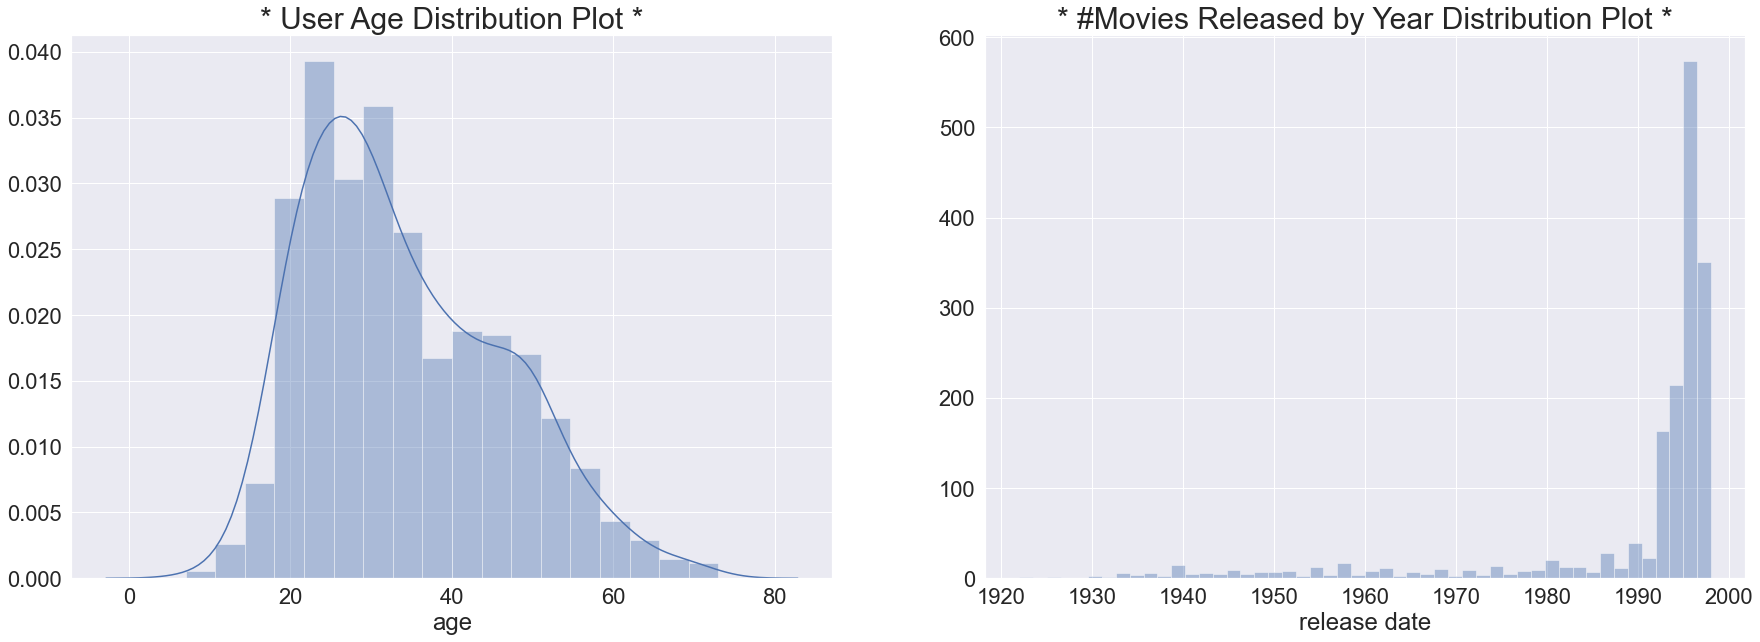

In [932]:
# a = 'My*cat*is*brown'
# print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

# print(a[10:])
# print(a[-5:])
# pd.DatetimeIndex(df['birth_date']).year
# m = mdf
# pd.DatetimeIndex(mdf['release date']).year
# m['ryr'] = pd.DatetimeIndex(mdf['release date']).year

fig, axs = plt.subplots(ncols = 2, figsize = (30, 10))

sns.distplot(udf.age, ax = axs[0]).set_title('* User Age Distribution Plot *', fontsize=30)

sns.distplot(pd.DatetimeIndex(mdf['release date']).year,kde=False, ax = axs[1]).set_title('* #Movies Released by Year Distribution Plot *', fontsize=30)

# sns.distplot(df['Age'], ax = axs[0])
# sns.distplot(df['Age_Z_Manual'], ax = axs[1])
# sns.distplot(df['Age_Norm_Manual'], ax = axs[2])
# sns.distplot(df['Age_Log'], ax = axs[3]);

# sns.distplot(pd.DatetimeIndex(mdf['release date']).year,kde=False)
# pd.DatetimeIndex(mdf['release date']).year.value_counts()


Text(0.5, 1.0, '* User Ratings Count Distribution Plot *')

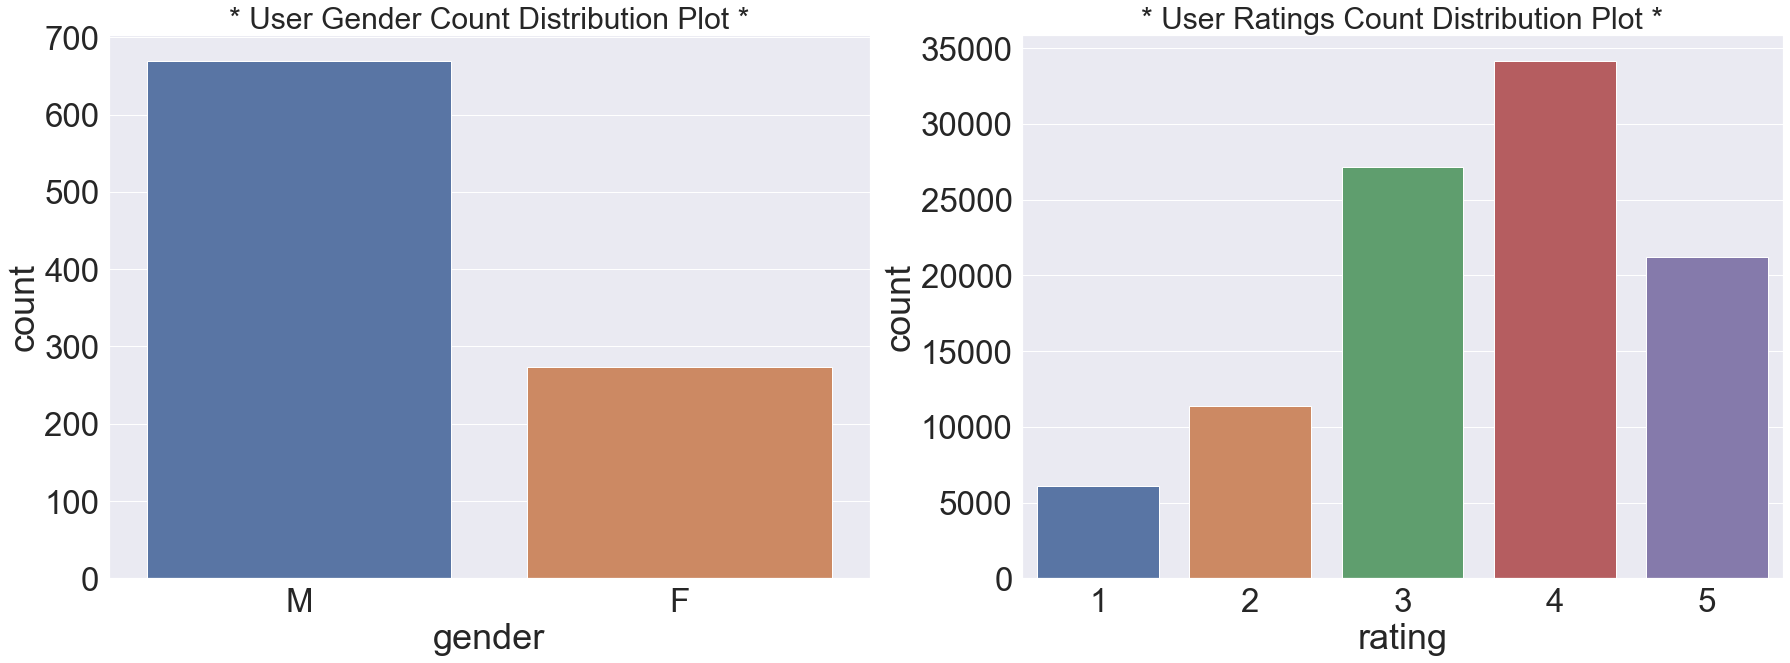

In [881]:
#your answers here

# Set plot configs
sns.set(font_scale=3)
fig, axs = plt.subplots(ncols = 2, figsize = (30, 10))

sns.countplot(udf.gender, ax = axs[0]).set_title('* User Gender Count Distribution Plot *', fontsize=30)

sns.countplot(xdf.rating, ax = axs[1]).set_title('* User Ratings Count Distribution Plot *', fontsize=30)

Text(0.5, 1.0, '* User Occupation Count Distribution Plot *')

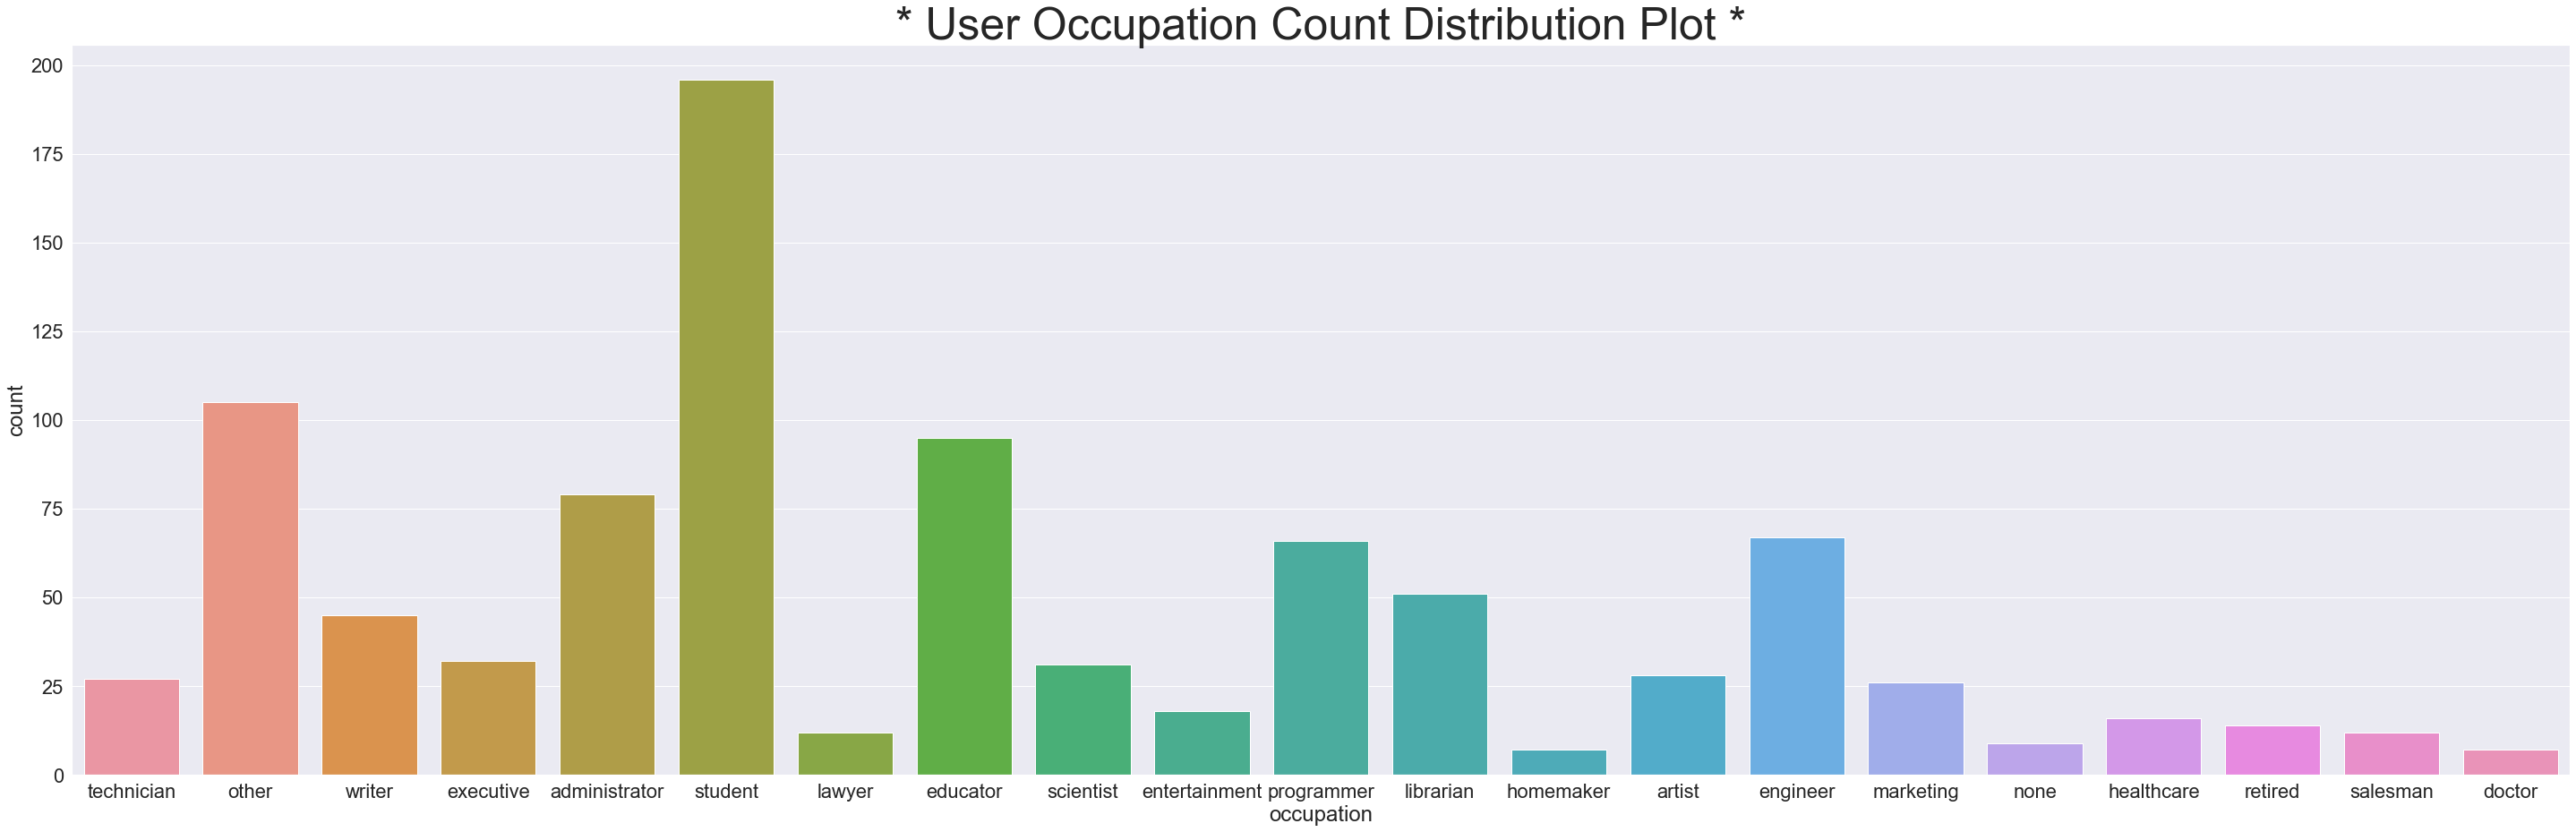

In [900]:
sns.set(font_scale=2)
fig, axs = plt.subplots(figsize = (50, 15))
sns.countplot(udf.occupation).set_title('* User Occupation Count Distribution Plot *', fontsize=50)



### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

Text(0.5, 1.0, '\n* Genre Popularity Change Over Years Heatmap (Log Scale) *\n')

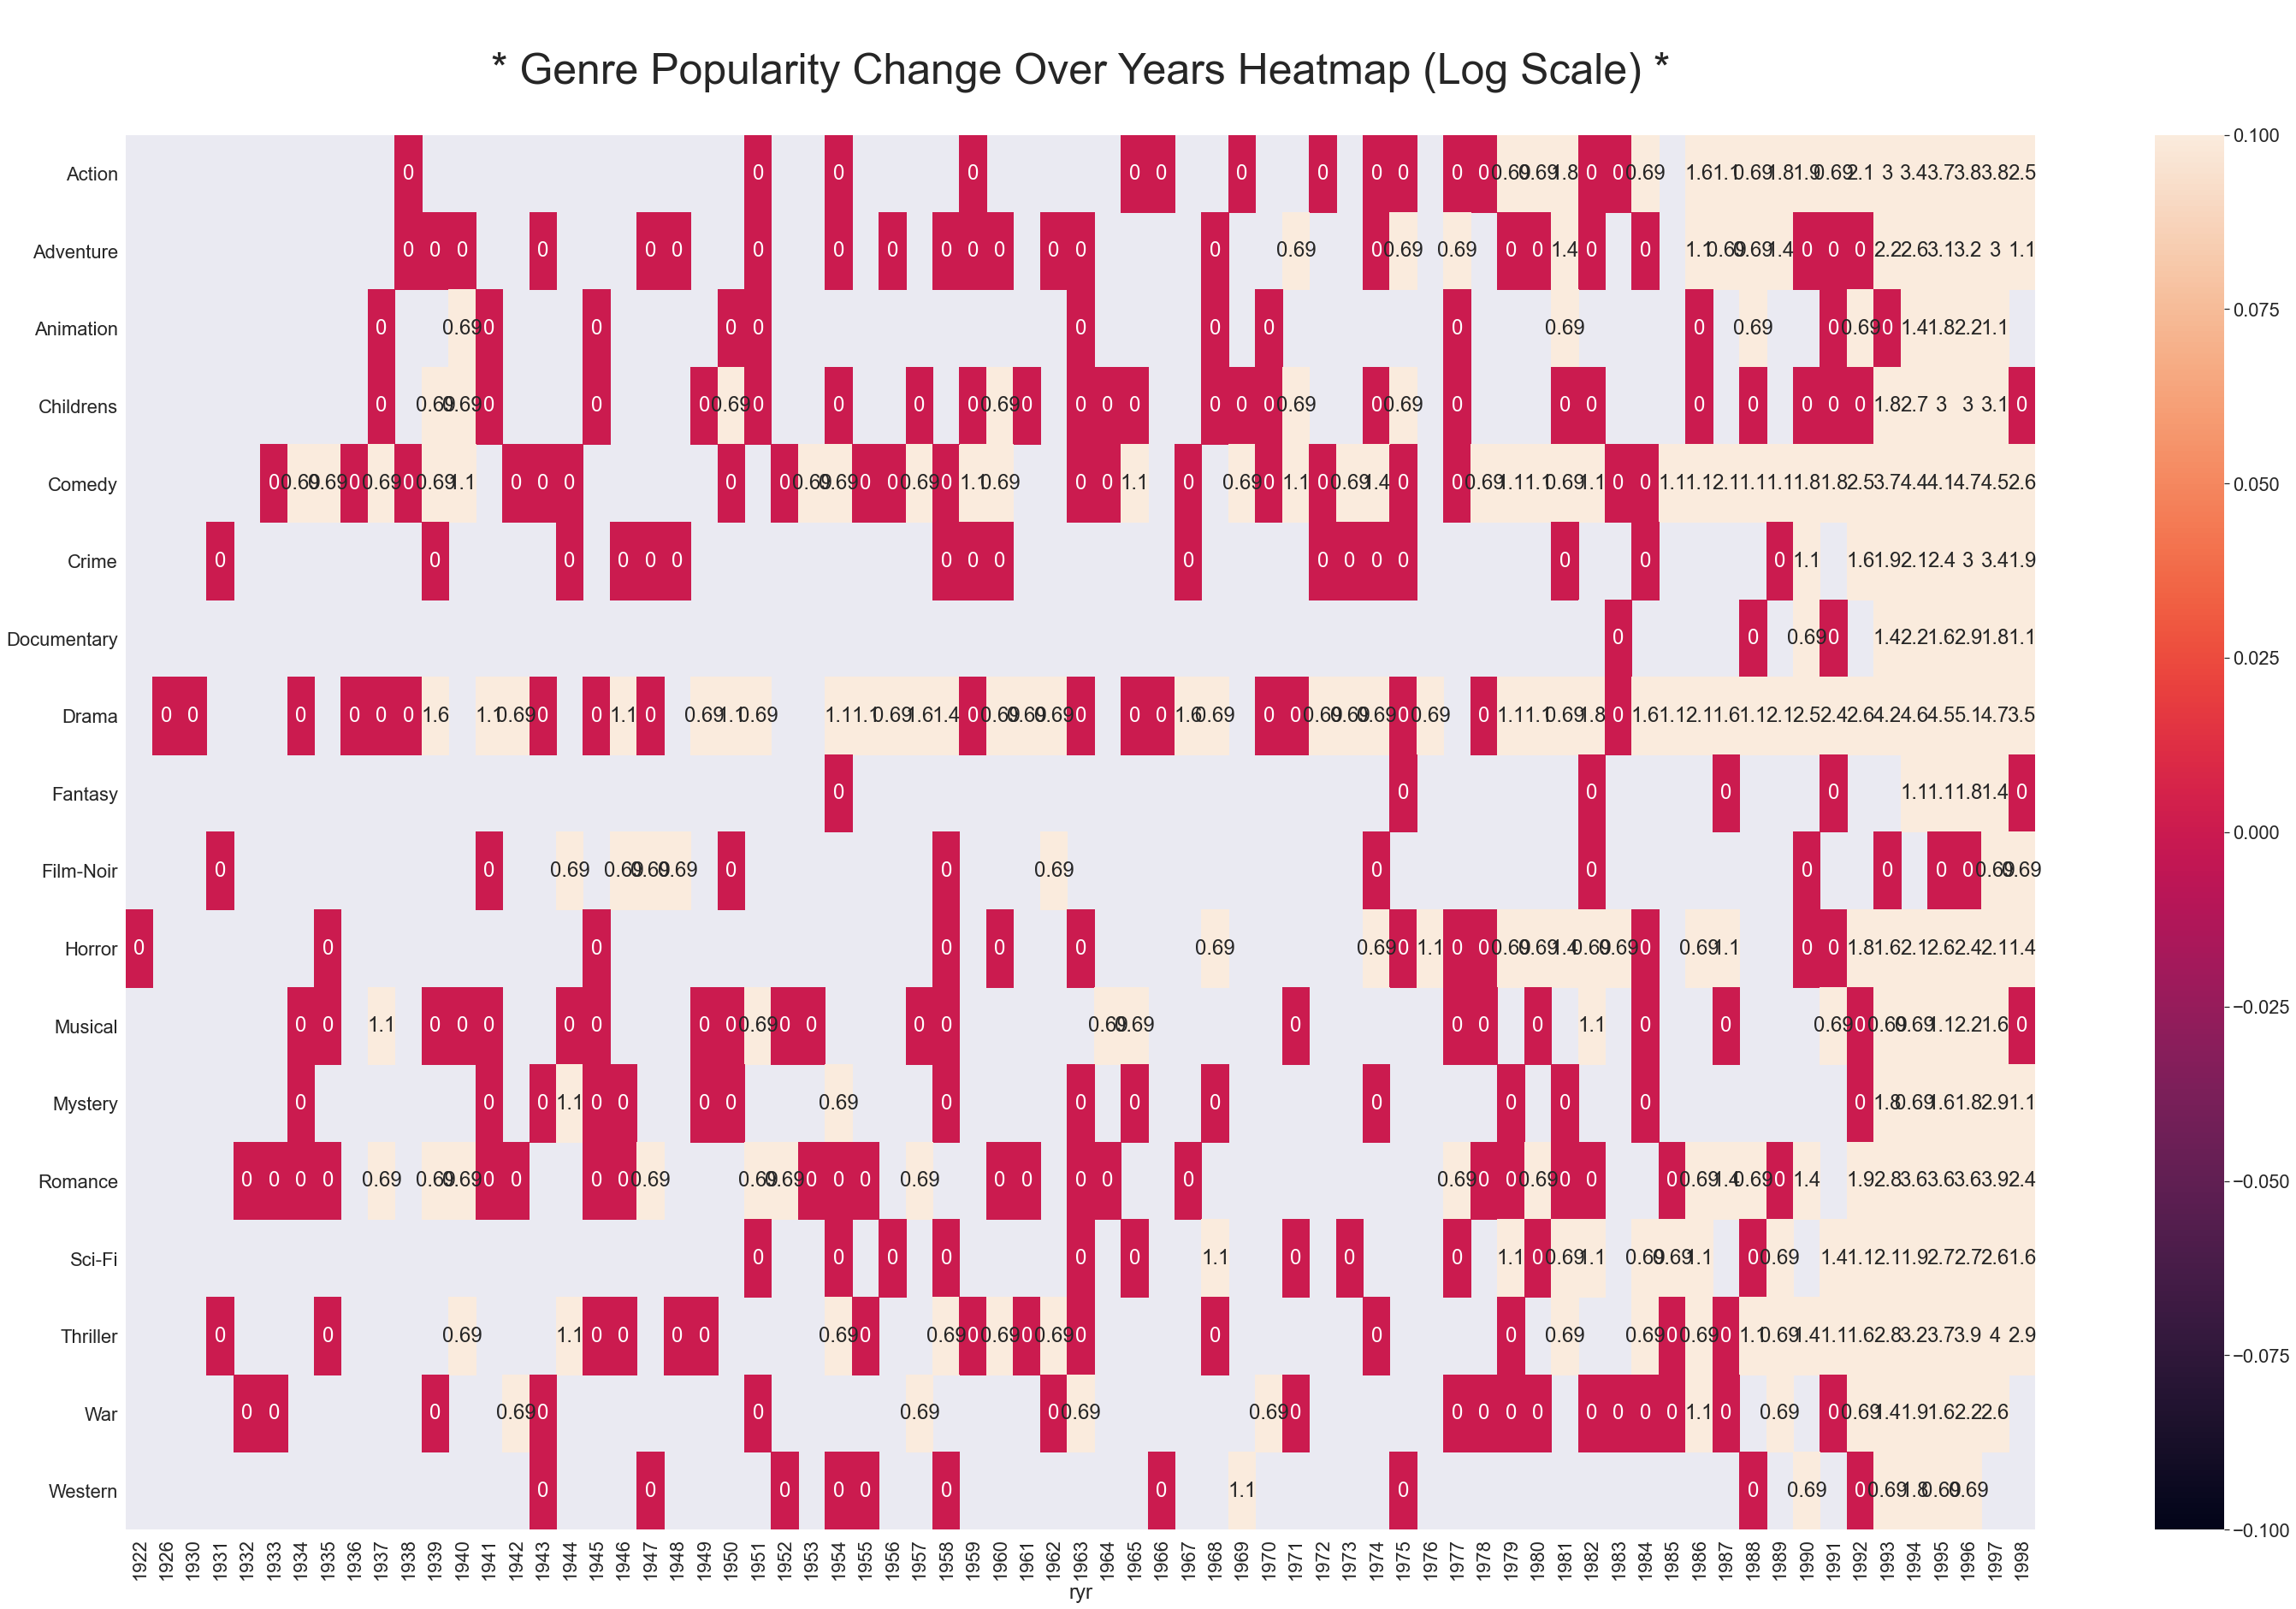

In [1129]:
#Your answer here
# mdf.groupby(pd.DatetimeIndex(mdf['release date']).year)
# mdf.groupby(pd.DatetimeIndex(mdf['release date']).year).sum()
# mdf.groupby(pd.DatetimeIndex(mdf['release date']).year).sum()
# m = mdf.groupby('ryr').sum()
# sns.distplot(mdf.ryr)
# m.drop(columns = 'movie id', inplace=True)
# m.drop(columns = 'unknown', inplace=True)
# m.shape

sns.set(font_scale=2)
fig, axs = plt.subplots(figsize = (50, 30))

# sns.heatmap(m)
# m.ryr = pd.DatetimeIndex(mdf['release date']).year

sns.heatmap(np.log(m.T), annot=True, robust=True, square=None).set_title('\n* Genre Popularity Change Over Years Heatmap (Log Scale) *\n', fontsize=50)



### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [1968]:
#your answer here

# m = xdf['movie id'].value_counts()
# m = pd.DataFrame(m)
# m[m.index.sort_values()]
# m[m>100].sort_values(ascending=False).head(25)
# mtop = m[m>100].sort_values(ascending=False).head(25)
# mtopx = mtop
# mtopy = mtopx.extend(mdf['movie title'])
# mtopx['movie'] = mdf['movie title']
# df1 = pd.DataFrame(data=sf.index, columns=['email'])
# mtopx = pd.DataFrame(data=mtop.index, columns=['movie id'])
# mtopy = pd.DataFrame(data=mtop.values, columns=['rcount'])
# mtopz = pd.merge(mtopx, mtopy, left_index=True, right_index=True)
# mtopz['movie'] = mdf['movie title']

# m100 = xdf['movie id'].value_counts()

mdf.drop(mdf[mdf['unknown']==1].index, inplace = True)

# m100x = m100[(m100>100)]
m100 = xdf.groupby(['movie id']).count()

m100x = m100[m100.rating>100]
m100c = m100x
m100m = xdf.groupby(['movie id']).mean()

m100s = xdf.groupby(['movie id']).sum()

m100c['avgrate'] = m100m['rating']
m100r = m100c

m100c['sumrate'] = m100s['rating']
mtop25 = m100c.sort_values('avgrate',ascending=False).head(25)
mtop25x = mtop25

# mtop25x['mtitle'] = mdf['movie title']

# mdfx = mdf.groupby(['movie id'])['movie title']

# mtop25x.merge(mdfx[['movie id','movie title']], on='movie id')

mtop25 = mtop25x.merge(mdf[['movie id','movie title']], on='movie id')

mtop25   # display the results for top 25 movies in decending order of the Average Ratings ("avgrate") column

,movie id,user id,rating,timestamp,avgrate,sumrate,ave_rate,movie title
0,408,112,112,112,4.49,503,4.49,"Close Shave, A"
1,318,298,298,298,4.47,1331,4.47,Schindler's List
2,169,118,118,118,4.47,527,4.47,"Wrong Trousers, The"
3,483,243,243,243,4.46,1083,4.46,Casablanca
4,64,283,283,283,4.45,1258,4.45,"Shawshank Redemption, The"
5,603,209,209,209,4.39,917,4.39,Rear Window
6,12,267,267,267,4.39,1171,4.39,"Usual Suspects, The"
7,50,583,583,583,4.36,2541,4.36,Star Wars
8,178,125,125,125,4.34,543,4.34,12 Angry Men
9,134,198,198,198,4.29,850,4.29,Citizen Kane


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [2051]:
# Men watch more drama than women = FALSE Women watched more Drama (56.5%) than Men (54.9%)

# Women watch more Sci-Fi than men = FALSE Men watched more Sci.Fi (19.2%) than Women (13.5%)

# Men watch more Romance than women = FALSE Women watched more Romance (30%) than Men (25.9%)

# From the analyzed data below here are the findings:

# ======================== Drama  Romance   Sci.Fi ========
# Total Female Ratings # = 11008  +  5858  + 2629  = 19495
# Total Female Ratings % = 56.5%  +   30%  + 13.5% = 100%

# Total Male   Ratings # = 28887  + 13603  + 10101 = 52591
# Total Male   Ratings % = 54.9%  + 25.9%  + 19.2% = 100%



In [2052]:
mdfx = mdf.copy()

xdfx = xdf.copy()

udfx = udf.copy()

xdfy = xdfx.merge(udf[['user id', 'gender']], on='user id') # get Gender of user who rated this movie

xdfz = xdfy.merge(mdf[['movie id', 'Drama', 'Romance', 'Sci-Fi']], on='movie id') # get Genere of movie rated by this user

xdfa = xdfz.groupby('gender').sum() # sum each of the 3 Generes by Gender (M,F)

xdfa # display the results for percentage calculations below:


,user id,movie id,rating,timestamp,Drama,Romance,Sci-Fi
gender,,,,,,,
F,12225832,11452645,90894,22748573259055,11008,5858,2629
M,34019655,31096592,262060,65595552186588,28887,13603,10101


In [ ]:
# From the analyzed data above here are the findings:

# Total Female Ratings # = 11008 +  5858 + 2629  = 19495
# Total Female Ratings % = 56.5% +   30% + 13.5% = 100%

# Total Male   Ratings # = 28887 + 13603 + 10101 = 52591
# Total Male   Ratings % = 54.9% + 25.9% + 19.2% = 100%
